In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [5]:
data = pd.read_csv("../data/data_sample.csv")
semantic_sim = np.load("../data/cosine_sim_semantic.npy")
genre_sim = np.load("../data/genre_similarity.npy")
numeric_sim = np.load("../data/numeric_sim.npy")

w_semantic = 0.5
w_genre = 0.3
w_numeric = 0.2

hybrid_sim = (w_semantic * semantic_sim) + (w_genre * genre_sim) + (w_numeric * numeric_sim)

In [6]:
pca = PCA(n_components=2)
movie_coords = pca.fit_transform(hybrid_sim)

In [ ]:
data['x'] = movie_coords[:, 0]
data['y'] = movie_coords[:, 1]

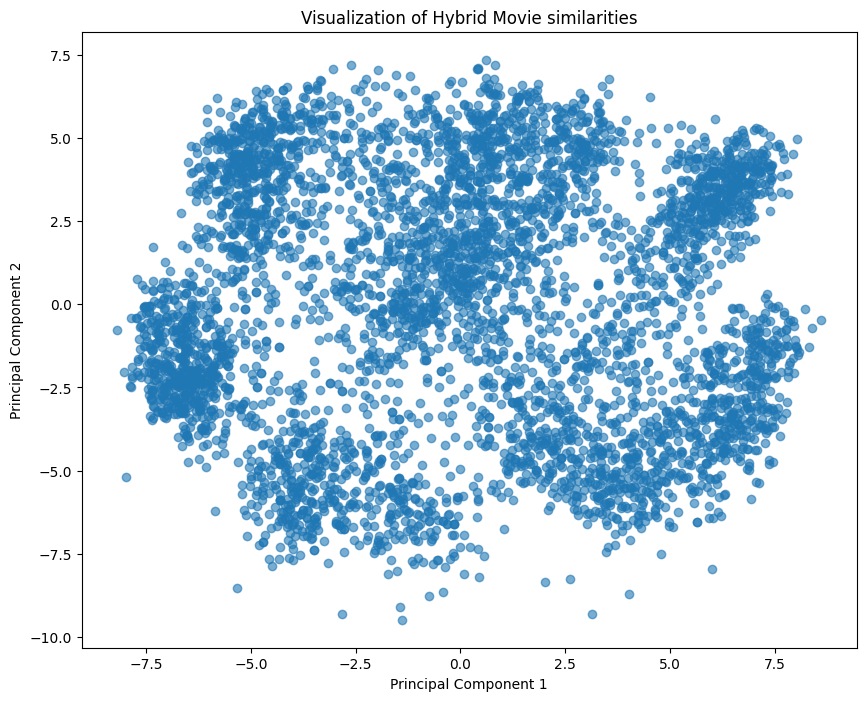

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(data['x'], data['y'], alpha=0.6,)
plt.title('Visualization of Hybrid Movie similarities')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [9]:
sample_size = min(1000, len(hybrid_sim))
sample_indices = data.sample(sample_size, random_state=42).index
sample_embeddings = hybrid_sim[sample_indices]
sample_titles = data.loc[sample_indices, 'movie_title']

In [14]:
tsne_df = pd.DataFrame({
    'x': sample_embeddings[:, 0],
    'y': sample_embeddings[:, 1],
    'movie_titles': sample_titles
})

In [15]:
tsne = TSNE(
    n_components=2,
    perplexity=30,
    max_iter=1000,
    random_state=42,
    verbose=1
    )

tsne_results = tsne.fit_transform(sample_embeddings)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.004s...
[t-SNE] Computed neighbors for 1000 samples in 0.153s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.246383
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.708420
[t-SNE] KL divergence after 1000 iterations: 0.506719


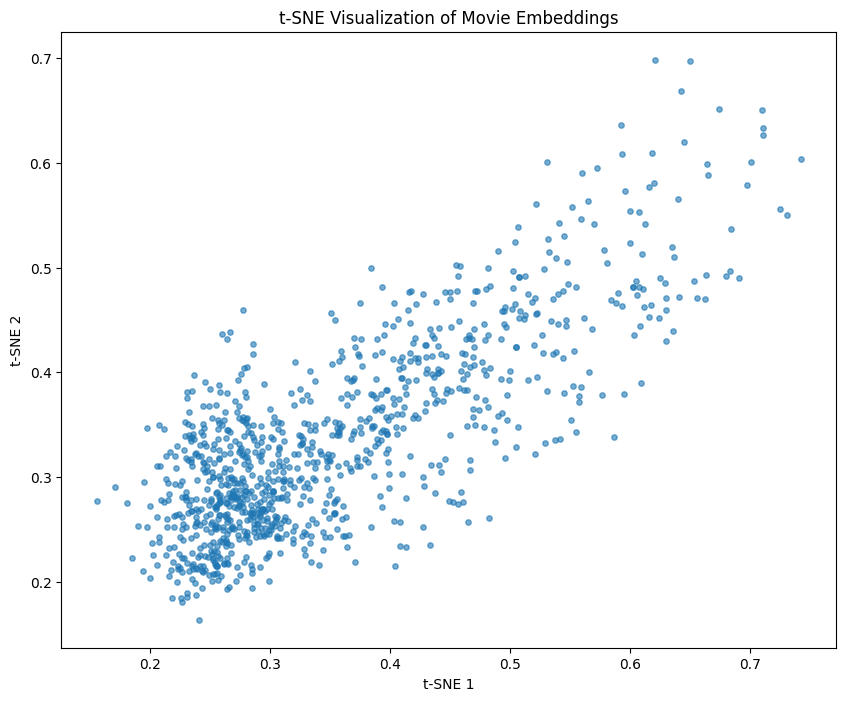

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['x'], tsne_df['y'], alpha=0.6, s=15)
plt.title("t-SNE Visualization of Movie Embeddings")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()